In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/satellite_telemetry.csv")
display(file_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ft,REFS_REFS_VALID,REFS_ESM_VALID,REFS_BETA_ANGLE,REFS_SUN_ECLIPSE_EARTH_PENUMBRA_FLAG,REFS_SUN_ECLIPSE_EARTH_UMBRA_FLAG,REFS_SUN_ECLIPSE_MOON_PENUMBRA_FLAG,REFS_SUN_ECLIPSE_MOON_UMBRA_FLAG,REFS_POSITION_WRT_ECI1,REFS_POSITION_WRT_ECI2,...,ANALOGS_PL_COMMAND_TEMP,ANALOGS_PL_POWER_TEMP,ANALOGS_BATTERY1_TEMP,ANALOGS_BATTERY_VOLTAGE,ANALOGS_BATTERY_1_CURRENT,GPS_GPS_VALID,GPS_MSG_TRACKED_SATELLITES,CSS_RAW_SUN_SENSOR_DATA12,CSS_RAW_SUN_SENSOR_DATA15,ATT_CTRL_SUN_AVOID_FLAG
0,2025-06-28T19:00:01.799Z,YES,YES,-0.89,NO,YES,NO,NO,3924.77068,-1396.02904,...,11.518,11.6205,8.3315,12.1635,-0.8550,NO,0,0,0,NO
1,2025-06-28T19:00:03.799Z,YES,YES,-0.89,NO,YES,NO,NO,3934.78556,-1403.07108,...,11.600,11.6000,8.3315,12.1635,-0.8305,NO,0,0,0,NO
2,2025-06-28T19:00:05.799Z,YES,YES,-0.89,NO,YES,NO,NO,3944.78136,-1410.10632,...,11.477,11.6205,8.3315,12.1635,-0.9040,NO,0,0,0,NO
3,2025-06-28T19:00:07.799Z,YES,YES,-0.89,NO,YES,NO,NO,3954.75802,-1417.13472,...,11.518,11.6205,8.3315,12.1635,-0.8245,NO,0,0,0,NO
4,2025-06-28T19:00:09.799Z,YES,YES,-0.89,NO,YES,NO,NO,3964.71550,-1424.15624,...,11.559,11.6205,8.3315,12.1635,-0.8245,NO,0,0,0,NO


In [ ]:
thermal_df = file_df[[
    'ft',
    'ANALOGS_BUS_TEMP',
    'ANALOGS_IMU_TEMP',
    'ANALOGS_PL_COMMAND_TEMP',
    'ANALOGS_PL_POWER_TEMP',
    'ANALOGS_BATTERY1_TEMP'
]].copy()
thermal_df.columns = [
    'timestamp',
    'bus_temp',
    'imu_temp',
    'cmd_temp',
    'power_temp',
    'battery_temp'
]
display(thermal_df.head())

,timestamp,bus_temp,imu_temp,cmd_temp,power_temp,battery_temp
0,2025-06-28T19:00:01.799Z,8.5075,13.650,11.518,11.6205,8.3315
1,2025-06-28T19:00:03.799Z,8.4200,13.620,11.600,11.6000,8.3315
2,2025-06-28T19:00:05.799Z,8.5295,13.620,11.477,11.6205,8.3315
3,2025-06-28T19:00:07.799Z,8.4200,13.605,11.518,11.6205,8.3315
4,2025-06-28T19:00:09.799Z,8.4200,13.610,11.559,11.6205,8.3315


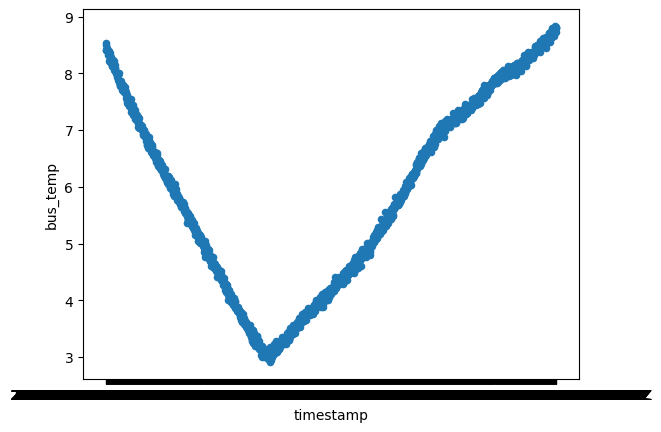

In [ ]:
thermal_df.plot(x='timestamp', y='bus_temp', kind='scatter')
plt.show()

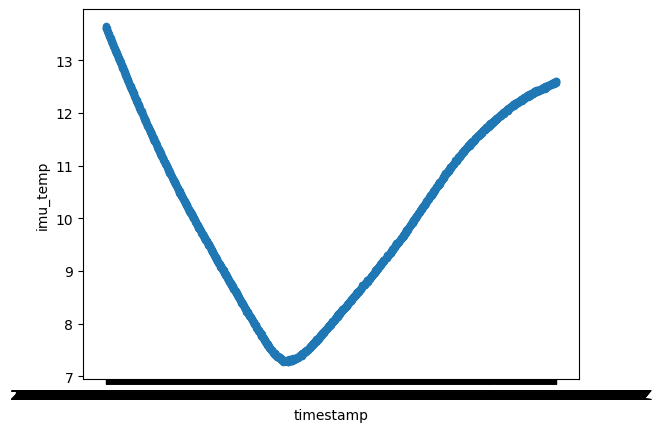

In [ ]:
thermal_df.plot(x='timestamp', y='imu_temp', kind='scatter')
plt.show()

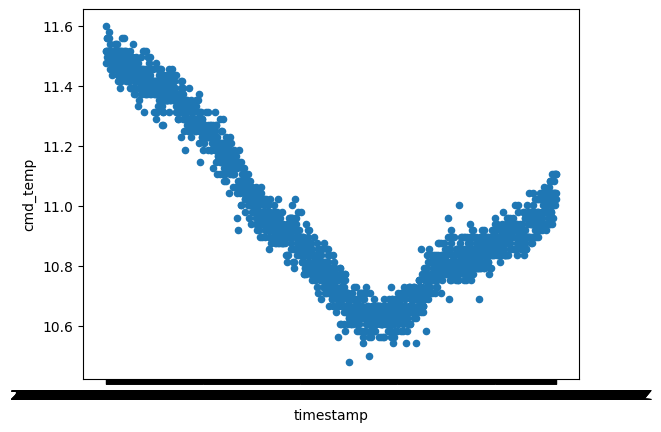

In [ ]:
thermal_df.plot(x='timestamp', y='cmd_temp', kind='scatter')
plt.show()

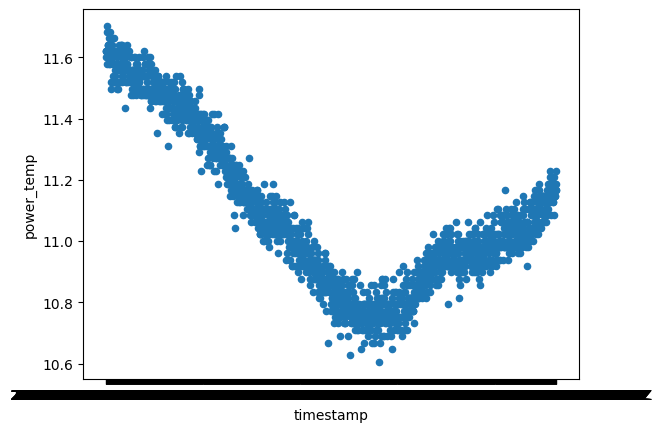

In [ ]:
thermal_df.plot(x='timestamp', y='power_temp', kind='scatter')
plt.show()

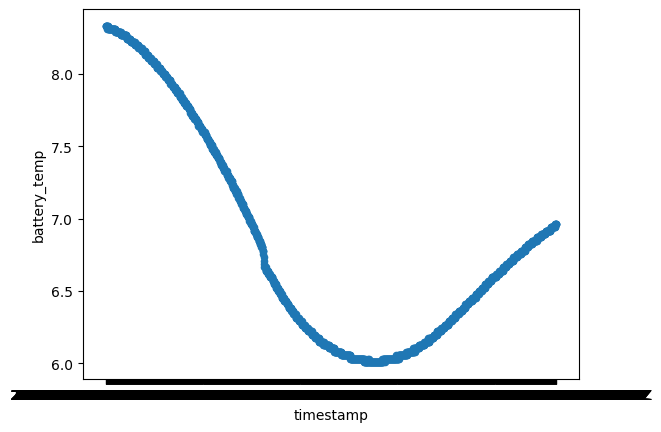

In [ ]:
thermal_df.plot(x='timestamp', y='battery_temp', kind='scatter')
plt.show()

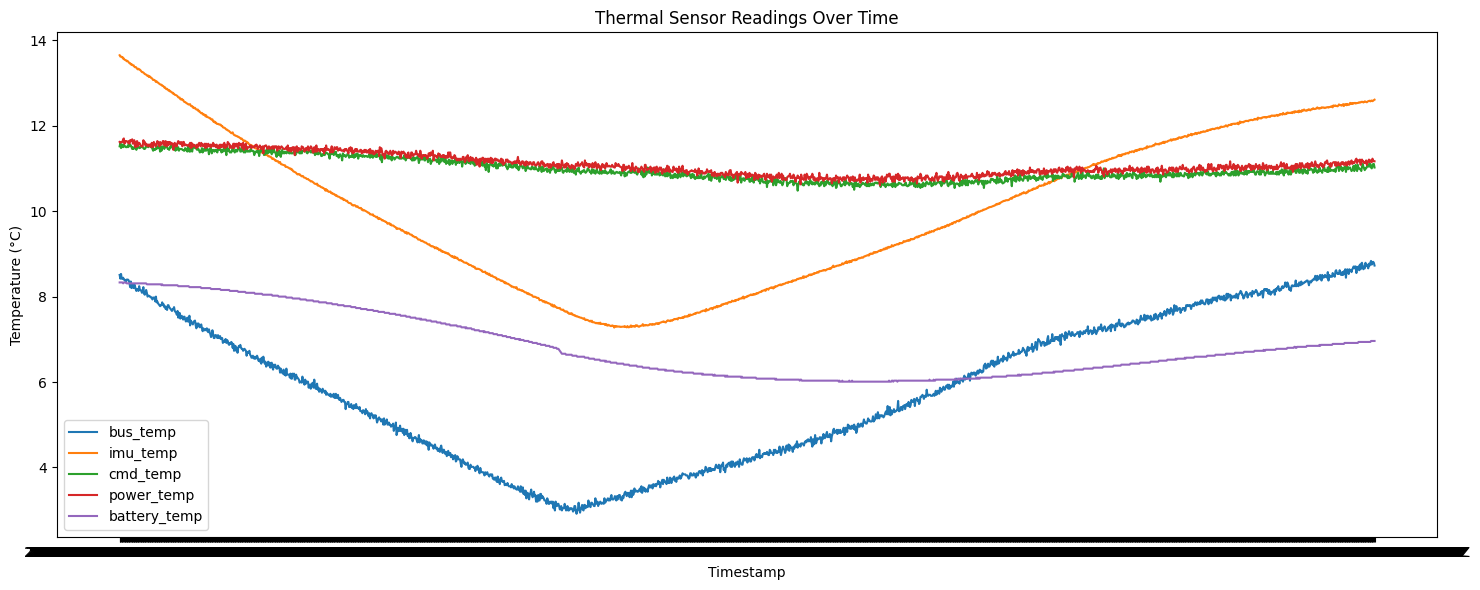

In [ ]:
plt.figure(figsize=(15, 6))
for col in thermal_df.columns[1:]:
    plt.plot(thermal_df['timestamp'], thermal_df[col], label=col)
plt.title("Thermal Sensor Readings Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
thresholds = {
    'bus_temp': (4, 8),
    'imu_temp': (6, 12),
    'cmd_temp': (10, 11.5),
    'power_temp': (10, 11.5),
    'battery_temp': (6.5, 8)
}



🔍 Fault Event Counts:
bus_temp: 596 fault(s)
imu_temp: 358 fault(s)
cmd_temp: 36 fault(s)
power_temp: 180 fault(s)
battery_temp: 1041 fault(s)
